# 1. Imports and Setup


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram


# 2. Load Dataset


In [ ]:
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

# 3. Milestone 1: Data Exploration & Visualization


In [3]:
# 3.1 Descriptive Statistics
print(df.describe(include='all'))

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

In [4]:
# 3.2 Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


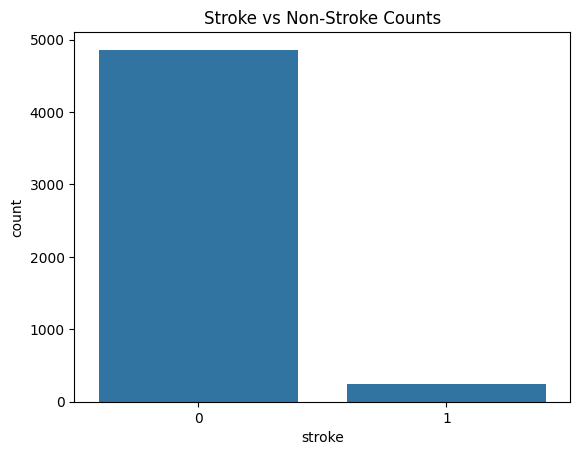

In [5]:
# 3.3 Target Distribution
sns.countplot(x='stroke', data=df)
plt.title('Stroke vs Non-Stroke Counts')
plt.show()

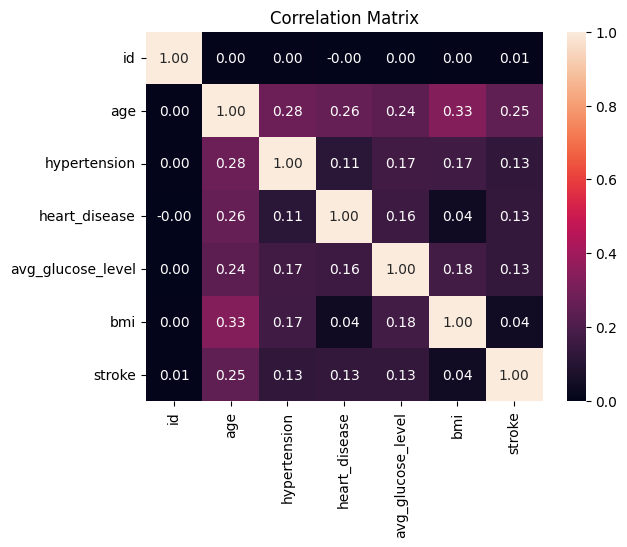

In [6]:
# 3.4 Correlation Heatmap (numeric only)
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

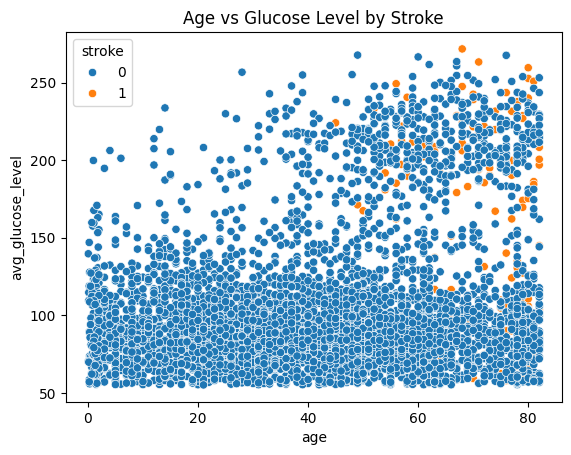

In [7]:
# 3.5 Age vs Glucose vs BMI Scatter
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)
plt.title('Age vs Glucose Level by Stroke')
plt.show()

# 4. Milestone 1: Data Cleaning & Preprocessing


In [8]:
# 4.1 Remove any zero Age or Glucose if biologically invalid
# (if present)  
df = df[df['age']>=1]
df = df[df['avg_glucose_level']>0]
df = df[df['bmi']>10]


In [9]:
# 4.2 Handle missing BMI by median imputation
df['bmi'].fillna(df['bmi'].median(), inplace=True)


C:\Users\acer\AppData\Local\Temp\ipykernel_13084\3792266138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [10]:
# 4.3 Encode categorical variables
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


# 5.train test split

In [11]:
# 5.1 Split features and target
X = df.drop(['id','stroke'], axis=1)
y = df['stroke']

In [12]:
# 5.2 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# 6.Normalization

In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 7. Dimensionality reduction

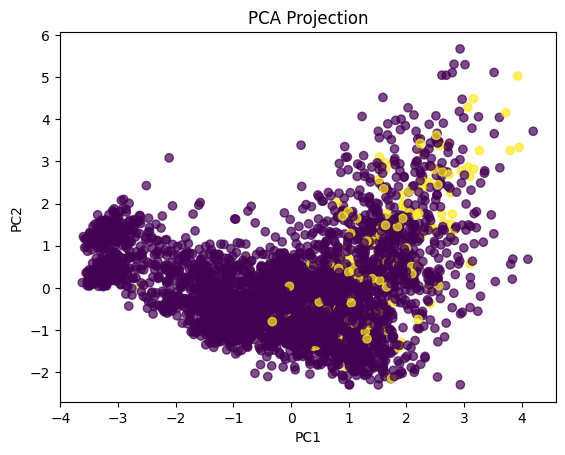

In [14]:
# PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_train_scaled)
plt.figure()
plt.scatter(pc[:,0], pc[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('PCA Projection')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

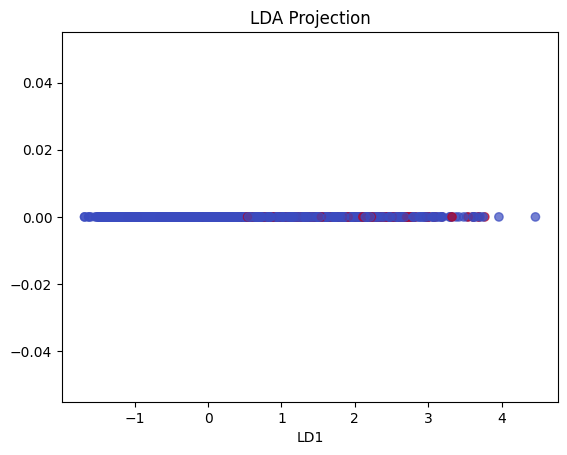

In [15]:
# LDA
lda = LDA(n_components=1)
lda_proj = lda.fit_transform(X_train_scaled, y_train)
plt.figure()
plt.scatter(lda_proj, np.zeros_like(lda_proj), c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.show()

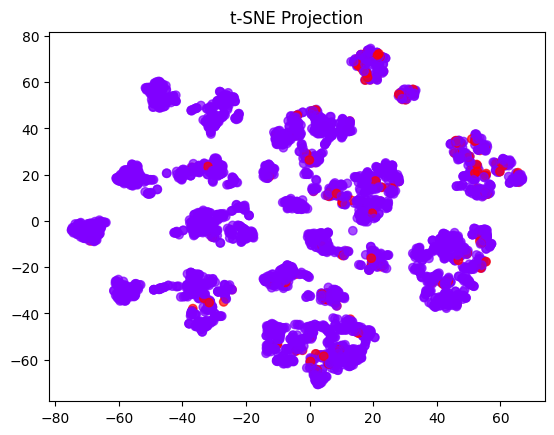

In [16]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_proj = tsne.fit_transform(X_train_scaled)
plt.figure()
plt.scatter(tsne_proj[:,0], tsne_proj[:,1], c=y_train, cmap='rainbow', alpha=0.7)
plt.title('t-SNE Projection')
plt.show()

# 8. Milestone 1: Training & Testing Classifiers


In [17]:
# 8.1 Naïve Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       932
           1       0.16      0.48      0.24        42

    accuracy                           0.87       974
   macro avg       0.57      0.68      0.58       974
weighted avg       0.94      0.87      0.90       974

Confusion Matrix:
[[827 105]
 [ 22  20]]


In [18]:
# 8.2 Linear SVM
from sklearn . svm import SVC
from sklearn . metrics import accuracy_score
svc = SVC ( random_state =42)
svc . fit ( X_train_scaled , y_train )
y_svc_pred = svc.predict ( X_test_scaled )
print("regular SVM Classification Report:")
print(classification_report(y_test, y_svc_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_svc_pred))

regular SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       932
           1       0.00      0.00      0.00        42

    accuracy                           0.96       974
   macro avg       0.48      0.50      0.49       974
weighted avg       0.92      0.96      0.94       974

Confusion Matrix:
[[932   0]
 [ 42   0]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# 8.3 Support Vector Machine with Grid Search
svc = SVC(probability=True, random_state=42)
param_svc = {'C':[0.1,1,10], 'kernel':['linear','rbf']}
grid_svc = GridSearchCV(svc, param_svc, cv=5, scoring='f1')
grid_svc.fit(X_train_scaled, y_train)
best_svc = grid_svc.best_estimator_
print("Best SVM Params:", grid_svc.best_params_)
y_pred_svm = best_svc.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Best SVM Params: {'C': 10, 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       932
           1       0.67      0.10      0.17        42

    accuracy                           0.96       974
   macro avg       0.81      0.55      0.57       974
weighted avg       0.95      0.96      0.94       974

Confusion Matrix:
[[930   2]
 [ 38   4]]


# 9.Visualization of Accuracy Change

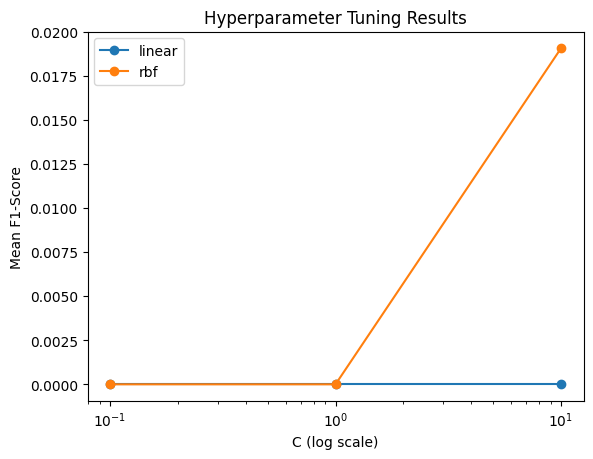

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
#We plot mean F1-score against C for both linear and RBF kernels to visualize the tuning landscape.

results = pd.DataFrame(grid_svc.cv_results_)
for kernel in ['linear', 'rbf']:
    subset = results[results['param_kernel'] == kernel]
    plt.plot(subset['param_C'], subset['mean_test_score'], 
             marker='o', label=kernel)

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean F1-Score')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.show()

## 10. Milestone 2: KNN & Decision Tree


In [21]:
# 10.1 K-Nearest Neighbors
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': list(range(3,12))}
grid_knn = GridSearchCV(knn, param_knn, cv=5, scoring='f1')
grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Params:", grid_knn.best_params_)
y_pred_knn = best_knn.predict(X_test_scaled)
print("KNN Classification Report:", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))

Best KNN Params: {'n_neighbors': 3}
KNN Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       932
           1       0.50      0.02      0.05        42

    accuracy                           0.96       974
   macro avg       0.73      0.51      0.51       974
weighted avg       0.94      0.96      0.94       974

Confusion Matrix: [[931   1]
 [ 41   1]]


In [23]:
# 10.2 Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_dt = {'max_depth': list(range(3,15)), 'min_samples_split':[2,5,10]}
grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='f1')
grid_dt.fit(X_train_scaled, y_train)
best_dt = grid_dt.best_estimator_
print("Best Decision Tree Params:", grid_dt.best_params_)
y_pred_dt = best_dt.predict(X_test_scaled)
print("Decision Tree Report:", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))

Best Decision Tree Params: {'max_depth': 14, 'min_samples_split': 5}
Decision Tree Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96       932
           1       0.09      0.07      0.08        42

    accuracy                           0.93       974
   macro avg       0.52      0.52      0.52       974
weighted avg       0.92      0.93      0.93       974

Confusion Matrix: [[902  30]
 [ 39   3]]


# Visualize tree


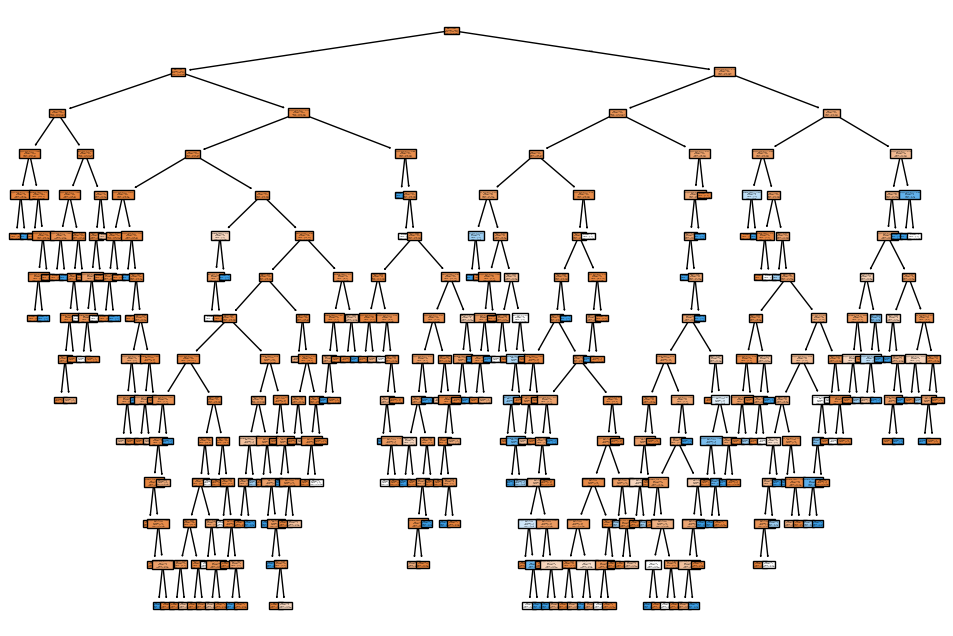

In [24]:
# Optional: visualize tree
plt.figure(figsize=(12,8))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Stroke','Stroke'], filled=True)
plt.show()

## 11. Milestone 2: Clustering Analysis


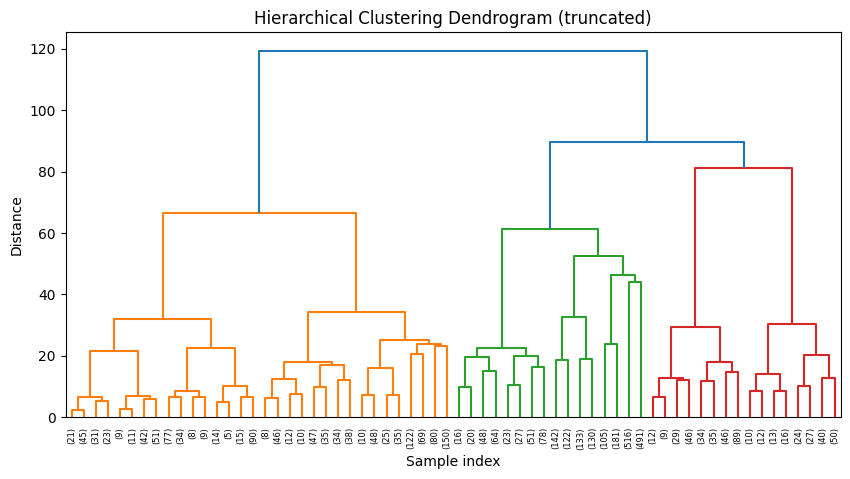

In [25]:
# 11.1 Hierarchical Clustering
linked = linkage(X_train_scaled, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

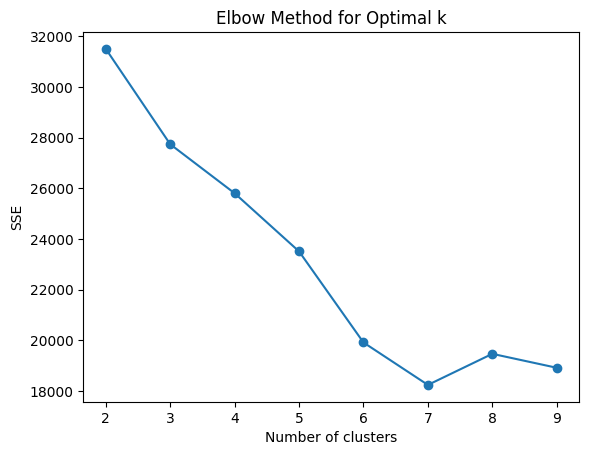

In [26]:
# 11.2 K-Means Clustering
# Determine optimal k via elbow method
sse = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_scaled)
    sse.append(km.inertia_)
plt.figure()
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [27]:
# Choose k (optimal is 7 from the graph in the above cell)
km_final = KMeans(n_clusters=7, random_state=42)
clusters = km_final.fit_predict(X_train_scaled)

# Analyze clusters vs actual stroke
cluster_df = pd.DataFrame(X_train_scaled, columns=X.columns)
cluster_df['cluster'] = clusters
cluster_df['stroke'] = y_train.values
print(cluster_df.groupby('cluster')['stroke'].mean())


cluster
0    0.001890
1    0.035306
2    0.031638
3    0.011220
4    0.127451
5    0.156250
6    0.088525
Name: stroke, dtype: float64
